# FILMS ANALYSIS AT THE BOX OFFICE

## OVERVIEW

This project uses exploratory data analysis to generate insights in movie patterns. The goal is to determine what type of films are currently doing best
at the box office for the company invest in as it starts its new movie studio. By cleaning, merging, grouping the data we understand what films
are apprppriate and how they are created.

## BUSINESS PROBLEM

The company is determined to launch a new movie studio though they lack insight in creating movies. The aim of this analysis is to determine
what type of films are currently doing best at the box office, then turn the findings into practical recommendations to help the company decide
what type of films to create.

## DATA UNDERSTANDING

This project uses movie datasets from multiple locations with different file formats, CSV, TSV, SQLite.
The primary dataset being used is the 
1. IMDB data which has a formart of SQLite Database, with **movie_basics** and **movie_ratings** as the relevant tables.

movie_basics table contain columns such as 
* movie_id "unique movie id number"
* primary_title "movie title displayed for audience"
* original_title "movie title as the createrors intended it"
* start_year "year movie started"
* runtime_minutes "movie duration in minutes"
* genres "movie categories"
    
and the movie_ratings table contain columns such as 
    
* movie_id "unique movie id number"
* averagerating "IMDb user ratings"
* numvotes- "number of user votes per movie"

**From the IMDB data we have "movie_id" column as the unique identification for movie_basics and movie_ratings tables**

2. Box Office Mojo Data which has a formart of csv (bom.movie_gross.csv.gz), it includes the following columns
* title "representing the movie title"
* studio "representing the production studio"
* domestic_gross "total revenue generated by films domestically"
* foreign_gross "total revenue generated by films internationaly"
* year "year of movie release"



# DATA PREPARATION

In [2]:
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movie_gross_df = pd.read_csv("./Data/bom.movie_gross.csv.gz")
movie_gross_df.head(7)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010


In [4]:
# creating a connection to sqlite database, then list all table names in the db
conn=sqlite3.connect("./Data/im.db")
df=pd.read_sql(
"""
SELECT name
FROM sqlite_master
WHERE type = "table"

""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,movie_details
9,movie_gross


In [5]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)
movie_basics_df.head(7)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"


In [6]:
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)
movie_ratings_df.head(7)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613


In [7]:
movie_details_df = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id);
""", conn)
movie_details_df.head(7)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [8]:
movie_details_df.shape

(73856, 8)

## Data cleaning

Data cleaning in the (*movie_basics* and *movie_ratings*) movie_details table

In [9]:
movie_details_df.shape

(73856, 8)

1. **genres column**

In [10]:
# nall values in the genres column
movie_details_df["genres"].isna().sum()

804

**we fill NaNs with mode because genres is a nominal categorical variable**

In [11]:
movie_details_df["genres"]=movie_details_df["genres"].fillna("uknown")

In [12]:
movie_details_df["genres"].isna().sum()

0

2. **Average ratings** column (movie ratings)

In [13]:
movie_details_df["averagerating"].isna().sum()

0

In [14]:
movie_details_df["numvotes"].isna().sum()

0

3. **runtime_minutes** column (movie duration)** 

In [15]:
movie_details_df["runtime_minutes"].isna().sum()

7620

**In numerical variables we fill NaN with either mode, median or mean. In this case we will use median because it is unique and not affected by outliers**

In [16]:
movie_details_df["runtime_minutes"].median()

91.0

In [17]:
movie_details_df["runtime_minutes"]=movie_details_df["runtime_minutes"].fillna(91.0)

In [18]:
movie_details_df["runtime_minutes"].isna().sum()

0

4. **primary_title** and **original_title** columns

In [19]:
movie_details_df["primary_title"].isna().sum()

0

In [20]:
movie_details_df["original_title"].isna().sum()

0

In [21]:
movie_details_df["start_year"].isna().sum()

0

Data cleaning in *movie_gross* table

1. **studio** column (movie studios)

In [22]:
movie_gross_df.shape

(3387, 5)

In [23]:
movie_gross_df["studio"].isna().sum()

5

**We fill NaNs with the mode most common production studio**

In [24]:
movie_gross_df["studio"].mode()

0    IFC
Name: studio, dtype: object

In [25]:
movie_gross_df["studio"] = movie_gross_df["studio"].fillna("IFC")

In [26]:
movie_gross_df["studio"].isna().sum()

0

2. **domestic_gross** column (revenue generated domestically)

In [27]:
movie_gross_df["domestic_gross"].isna().sum()

28

In [28]:
movie_gross_df["domestic_gross"].median()

1400000.0

In [29]:
movie_gross_df["domestic_gross"] = movie_gross_df["domestic_gross"].fillna(1400000.0)

In [30]:
movie_gross_df["domestic_gross"].isna().sum()

0

3. **foreign_gross** column (revenue generated internationaly)

In [31]:
movie_gross_df["foreign_gross"].isna().sum()

1350

In [32]:
movie_gross_df["foreign_gross"].mode()

0    1200000
Name: foreign_gross, dtype: object

In [33]:
# converting values in primary_title and title columns to lowercase then removing whitespace
movie_basics_df.loc[:,"primary_title"]=movie_basics_df["primary_title"].str.strip().str.lower()
movie_gross_df.loc[:,"title"]=movie_gross_df["title"].str.strip().str.lower()

In [34]:
#converting movie_gross dataFrame into sqlite database table 
movie_gross_df.to_sql("movie_gross", conn, if_exists="replace",index=False)

3387

In [35]:
pd.read_sql("PRAGMA table_info(movie_gross);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,title,TEXT,0,None,0
1,1,studio,TEXT,0,None,0
2,2,domestic_gross,REAL,0,None,0
3,3,foreign_gross,TEXT,0,None,0
4,4,year,INTEGER,0,None,0


## Data Analysis

**a) How success vary across different studios**

In [36]:
movie_gross_df["domestic_gross"].describe()

count    3.387000e+03
mean     2.851978e+07
std      6.675093e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.750000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [37]:
studio_by_revenue=movie_gross_df.groupby("studio")["domestic_gross"].mean().sort_values(ascending=False)
studio_by_revenue.head(7)

studio
BV         1.737644e+08
P/DW       1.682900e+08
WB (NL)    8.879333e+07
Uni.       8.777138e+07
WB         8.691461e+07
Fox        8.051103e+07
Sony       7.691894e+07
Name: domestic_gross, dtype: float64

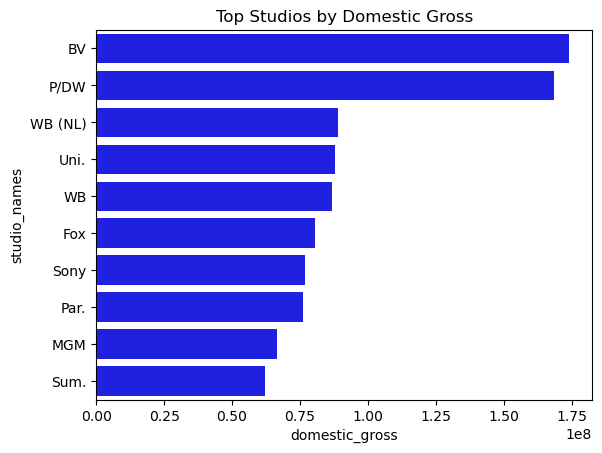

In [43]:
#Top studio by domestic gross
studio_by_revenue =movie_gross_df.groupby("studio")["domestic_gross"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=studio_by_revenue.values, y=studio_by_revenue.index, color="blue")
plt.title("Top Studios by Domestic Gross")
plt.xlabel("domestic_gross")
plt.ylabel("studio_names")
plt.show()

* We want perform a statistical test to confirm if the domestic revenue differ across the studios.
by comparing their means.
* The appropriete statistical test for this particular analysis is ANOVA TEST, because we are comparing
numeric vs categorical variables between more than 2 categorical groups(studios).

Stating the hypothesis

**Null Hypothesis**: The means of domestic gross across the studios are the same

**Alternative Hypothesis**: The means of in domestic gross across the studios are not the same.

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'domestic_gross ~ C(studio)'
lm = ols(formula, movie_gross_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(studio),256.0,6.019250e+18,2.351270e+16,8.116139,5.873600e-203
Residual,3130.0,9.067703e+18,2.897030e+15,NaN,NaN


**Conlusion**
  
Since the p-value is < 0.05 we Reject the Null hypothesis.
    
Hence we agree with the alternative hypothesis that domestic gross means are different across the studios,
meaning there is a strong statistical evidence that studios that produce a movie have an impact on how much money it earns domestically.


**Recommendation**

The company should study BV(Bueno Vista) a division of Disney studios strategy model in production being that it displayed the highest domestic mean gross

**b) Genre trends over-time** 

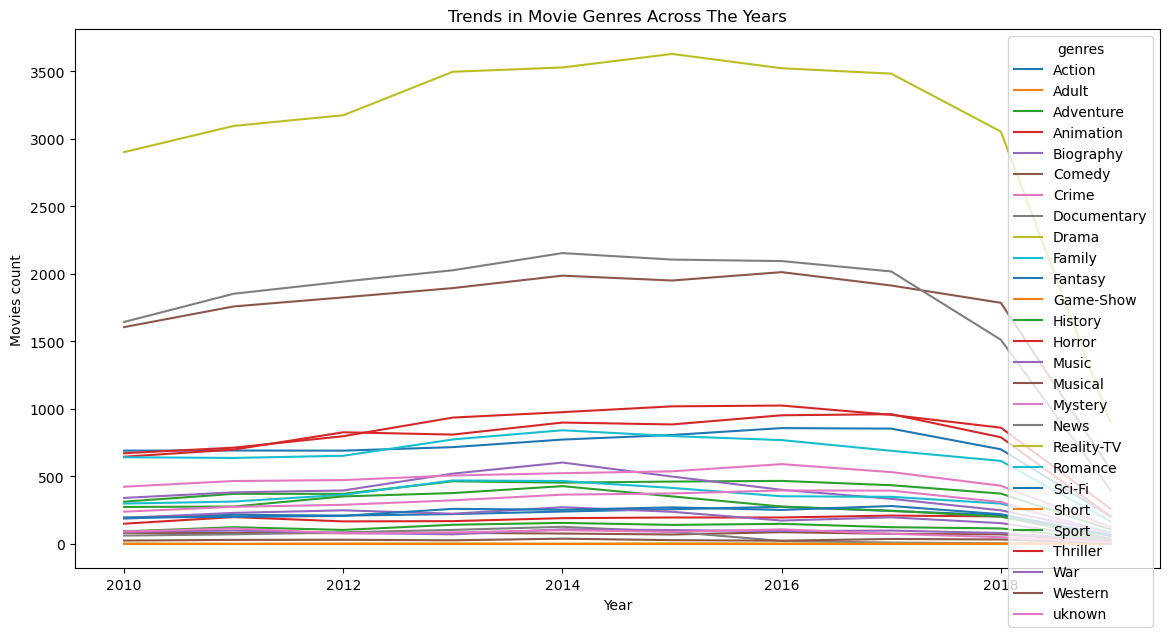

In [47]:
# spliting strings with 2 or more genres in a string to one
movie_details_df["genres"] = movie_details_df["genres"].apply(lambda x: x.split(",") if isinstance(x,str) else x)
movie_details_df = movie_details_df.explode("genres")

genre_trends = pd.crosstab(movie_details_df["start_year"],movie_details_df["genres"])

genre_trends.plot(figsize=(14, 7))
plt.xlabel("Year")
plt.ylabel("Movies count")
plt.title("Trends in Movie Genres Across The Years")
plt.show()